In [11]:
using PyPlot
include("gmm.jl");

In [12]:
gaussian_pdf(μ, σ²) = x -> exp(logpdf(gaussian, x, μ, σ²));

In [13]:
function visualize_trace(tr)
    n, k = get_args(tr)..., tr[:k]
    cmap = PyPlot.get_cmap("Paired")
    figure()
    for j=1:k
        y_js = [tr[:y => i] for i=1:n if tr[:z => i] == j]
        μ, σ² = tr[:μ => j], tr[:σ² => j]
        hist(y_js, normed=true, bins=6, color=cmap(2j-2), alpha=0.5)
        dom = (μ - 3sqrt(σ²)):1e-1:μ + 3sqrt(σ²)
        plot(dom, gaussian_pdf(μ, σ²).(dom), color=cmap(2j-1))
    end
end;

In [14]:
# Synthetic data generator
function generate_synthetic_data()
    constraints = choicemap((:k, 3),
                            (:μ => 1, -20.0), (:μ => 2, 10.0), (:μ => 3, 30.0),
                            (:σ² => 1, 3.0),  (:σ² => 2, 5.0), (:σ² => 3, 1.0))
    generate(gmm, (NUM_DATA_POINTS,), constraints)
end;

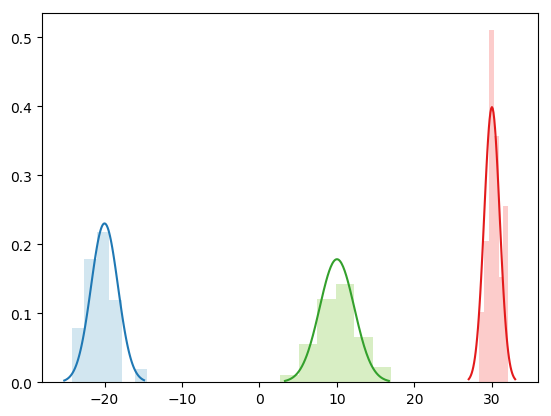

score: -336.5441214181095

In [15]:
NUM_DATA_POINTS = 100
tr, = generate_synthetic_data()
visualize_trace(tr);
print("score: $(get_score(tr))");

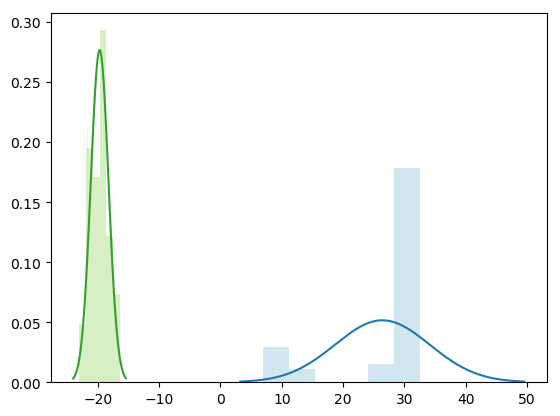

In [26]:
inference_tr = initial_trace(ys, poisson(λ), 3)
visualize_trace(inference_tr);

In [27]:
best_tr = inference_tr
for i=1:100
    inference_tr = mcmc_kernel(inference_tr)
    best_tr = get_score(inference_tr) > get_score(best_tr) ? inference_tr : best_tr
end;

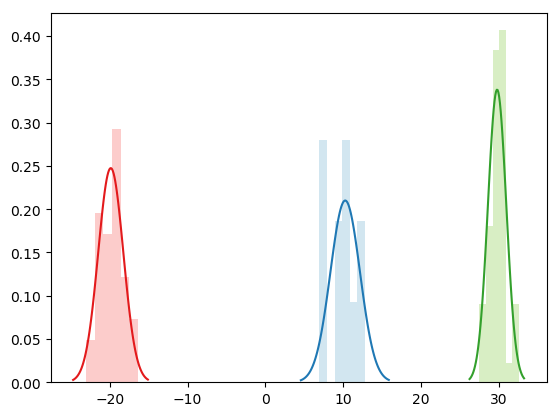

In [28]:
visualize_trace(best_tr)

In [19]:
get_score(best_tr)

-287.8911318851043